In [1]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

/pbs/throng/lsst/users/dagoret/External/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [2]:
import os
import re
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [3]:
#monthfile='MERRA2_2016_inst1_2d_asm_Nx_M2I1NXASM_ctio_11.csv'
#yearfile='MERRA2_2016_inst1_2d_asm_Nx_M2I1NXASM_ctio_AllYear.csv'

In [4]:
monthfile='MERRA2_2017_inst1_2d_asm_Nx_M2I1NXASM_ctio_06.csv'
yearfile='MERRA2_2017_inst1_2d_asm_Nx_M2I1NXASM_ctio_AllYear.csv'

## Per month

In [5]:
df_month=pd.read_csv(monthfile)

In [6]:
df_year=pd.read_csv(yearfile)

In [7]:
df_month.describe()

,ozone,pwv
count,696.000000,696.000000
mean,274.455378,4.703155
std,14.163948,2.100082
min,241.780853,0.637064
25%,264.803543,3.259303
50%,275.751633,4.148660
75%,283.758072,6.061206
max,308.591034,11.366414


In [10]:
h2o_month=df_month["pwv"]

In [11]:
mean_h2o_m = np.mean(h2o_month)
variance_h2o_m = np.var(h2o_month)
sigma_h2o_m = np.sqrt(variance_h2o_m)

In [12]:
mean_h2o_m=np.trunc(mean_h2o_m*1000)/1000
sigma_h2o_m=np.trunc(sigma_h2o_m*1000)/1000

In [13]:
print mean_h2o_m 
print variance_h2o_m 
print sigma_h2o_m 

4.703
4.40400888432
2.098


In [14]:
variation_m = variance_h2o_m/mean_h2o_m  
print 'monthly variation = ',variation_m

monthly variation =  0.936425448505


In [15]:
title = "Monthly variation of H2O (jun 2017), mean = {} std = {}".format(mean_h2o_m ,sigma_h2o_m)

/pbs/throng/lsst/users/dagoret/External/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


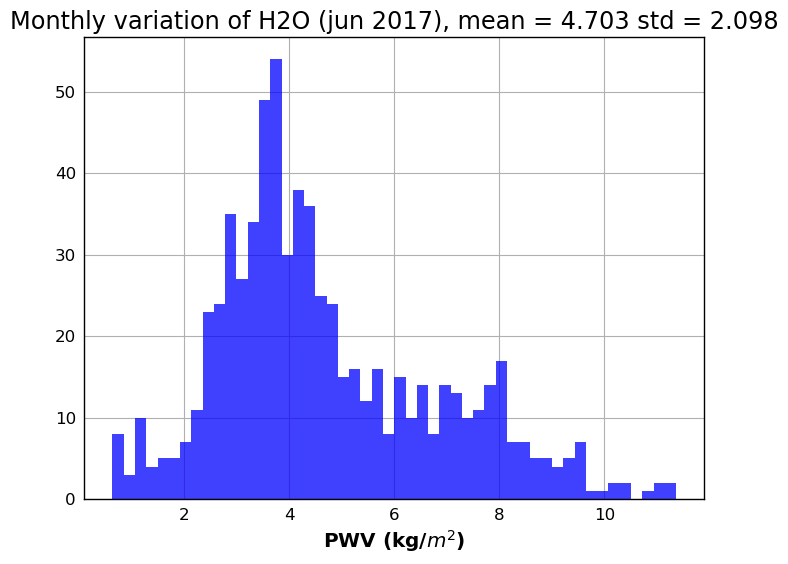

In [16]:
n, bins, patches = plt.hist(h2o_month, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('PWV (kg/$m^2$)')
plt.savefig('HistoH2O2017_06.pdf')

## Per year

In [17]:
df_year.describe()

,ozone,pwv
count,1464.000000,1464.000000
mean,271.979286,5.205767
std,12.735447,2.419248
min,241.780853,0.637064
25%,262.272858,3.395078
50%,270.982361,4.580555
75%,281.492615,6.782194
max,308.591034,12.429529


In [18]:
df_year.quantile([0.05,0.1,0.5,0.9,0.95])

,ozone,pwv
0.05,253.407852,2.185573
0.10,256.024014,2.606574
0.50,270.982361,4.580555
0.90,288.998474,8.632355
0.95,293.286668,10.195137


In [21]:
h2o_year=df_year["pwv"]

In [22]:
h2o_year.replace(to_replace=0, value=np.nan)

0       2.822547
1       2.668410
2       2.609197
3       2.579537
4       2.517037
5       2.423533
6       2.317495
7       2.216904
8       2.111483
9       1.996691
10      1.945912
11      1.918895
12      1.935192
13      1.998366
14      2.110613
15      2.295149
16      2.579033
17      2.979146
18      3.444058
19      3.879932
20      4.234325
21      4.461420
22      4.536150
23      4.437186
24      4.238254
25      4.076549
26      3.949310
27      3.786940
28      3.512259
29      3.275678
          ...   
1434    4.396712
1435    4.482931
1436    4.492946
1437    4.354486
1438    4.083207
1439    3.669311
1440    3.194967
1441    2.758607
1442    2.358295
1443    2.037874
1444    1.817427
1445    1.658883
1446    1.515510
1447    1.371268
1448    1.269709
1449    1.191292
1450    1.152435
1451    1.137758
1452    1.106233
1453    1.090577
1454    1.153771
1455    1.260004
1456    1.427986
1457    1.689911
1458    1.979488
1459    2.211512
1460    2.335595
1461    2.3117

In [23]:
np.mean(h2o_year)

5.205766872385759

In [24]:
mean_h2o_y = np.mean(h2o_year)
variance_h2o_y = np.var(h2o_year)
sigma_h2o_y = np.sqrt(variance_h2o_y)

In [25]:
mean_h2o_y=np.trunc(mean_h2o_y*1000)/1000
sigma_h2o_y=np.trunc(sigma_h2o_y*1000)/1000

In [26]:
print mean_h2o_y 
print variance_h2o_y 
print sigma_h2o_y 

5.205
5.84876187383
2.418


In [27]:
title = "Yearly variation of H2O (year 2017), mean = {} std = {}".format(mean_h2o_y ,sigma_h2o_y)

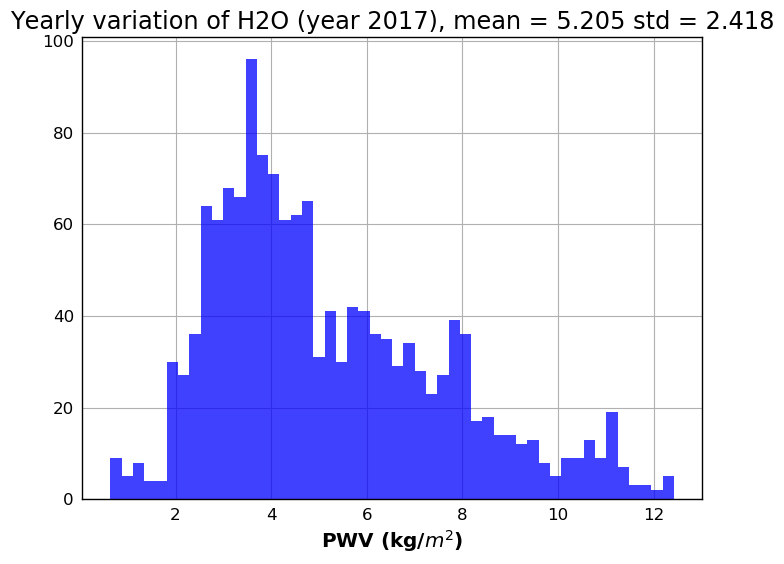

In [28]:
n, bins, patches = plt.hist(h2o_year, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('PWV (kg/$m^2$)')
plt.savefig('HistoH2O2017_allyear.pdf')